In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from IPython.core.display import display, HTML
plt.rcParams.update({'figure.max_open_warning': 0})
display(HTML("<style>.container { width:80% !important; }</style>"))
pd.set_option('display.max_columns', None)

# 1. Loading and cleaning the data

### Loading the data
The data was gathered by web scraping sale offers from otomoto.pl. It is the Poland's greatest internet car sale website.
This way, we can analyze 3500+ offers in order to get to know the market and be able to predict the car value based on features listed below

The data was gathered on 08.01.2024

In [44]:
file_path = r"C:\Users\Kamil\OneDrive\Inżynieria danych i Data Science\BMW-3-market_analysis_and_price_prediction\data\BMW3_data.csv"

data = pd.read_csv(file_path)
data.head()

,Nazwa,Cena,Oferta od,Pokaż oferty z numerem VIN,Ma numer rejestracyjny,Marka pojazdu,Model pojazdu,Wersja,Generacja,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie Poza Miastem,Spalanie W Mieście,Typ nadwozia,Emisja CO2,Liczba drzwi,Liczba miejsc,Kolor,Rodzaj koloru,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Numer rejestracyjny pojazdu,Zarejestrowany w Polsce,Tuning,Stan,VIN,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Spalanie W Cyklu Mieszanym,Okres gwarancji producenta,lub do (przebieg km),Możliwość finansowania,Faktura VAT,Uszkodzony,VAT marża,Gwarancja dealerska (w cenie),Miesięczna rata,Opłata początkowa,Liczba pozostałych rat,Wartość wykupu,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Autonomia
0,BMW Seria 3 330d,21 900,Prywatne,Tak,Tak,BMW,Seria 3,330d,E46 (1998-2007),2003,436 000 km,2 993 cm3,Diesel,204 KM,Manualna,Na tylne koła,5.0 l/100km,9 l/100km,Sedan,177 g/km,4.0,5.0,Czarny,Metalik,Szwajcaria,06 czerwiec 2003,WL7585R,Tak,Tak,Używane,Wyświetl VIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW Seria 3 328i Sport Line,77 600,Prywatne,Tak,Tak,BMW,Seria 3,328i Sport Line,F30/F31 (2012-2020),2016,92 000 km,1 997 cm3,Benzyna,245 KM,Automatyczna,4x4 (stały),NaN,"8,30 l/100km",Sedan,NaN,4.0,NaN,Granatowy,Metalik,Stany Zjednoczone,styczeń 2016,SZO5EC5,Tak,NaN,Używane,Wyświetl VIN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW Seria 3 320d xDrive Luxury Line,29 999,Prywatne,Tak,Tak,BMW,Seria 3,320d xDrive Luxury Line,E90/E91/E92/E93 (2005-2012),2012,288 000 km,1 995 cm3,Diesel,184 KM,Manualna,4x4 (stały),4.0 l/100km,6 l/100km,Kombi,129 g/km,5.0,5.0,Czarny,Perłowy,Austria,09 styczeń 2012,KN5472H,Tak,NaN,Używane,Wyświetl VIN,Tak,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW Seria 3 330d Touring M Sport,69 900,Prywatne,Tak,NaN,BMW,Seria 3,330d Touring M Sport,F30/F31 (2012-2020),2013,189 800 km,2 993 cm3,Diesel,258 KM,Automatyczna,Na tylne koła,NaN,"6,70 l/100km",Kombi,NaN,5.0,NaN,Inny kolor,NaN,NaN,NaN,NaN,NaN,NaN,Używane,Wyświetl VIN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW Seria 3,58 500,Prywatne,Tak,Tak,BMW,Seria 3,NaN,E90/E91/E92/E93 (2005-2012),2010,209 000 km,2 996 cm3,Benzyna,218 KM,Automatyczna,Na tylne koła,NaN,NaN,Sedan,NaN,4.0,NaN,Szary,NaN,Szwajcaria,NaN,NaN,Tak,NaN,Używane,Wyświetl VIN,Tak,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see there are a lot of problems with the data:
* Columns that don't add information - they were website's technical values
* Columns that have distinct value for every data point (car registration number)
* Columns that are directly tied to other columns
* Missing values
* Units in numeric values

In [45]:
columns_to_check = list(data.columns)

for column in columns_to_check:
    if len(data[column].unique()) <= 10:
        print("Wartości " + column + " " + str(data[column].unique()))

Wartości Oferta od ['Prywatne' 'Firma']
Wartości Pokaż oferty z numerem VIN ['Tak' nan]
Wartości Ma numer rejestracyjny ['Tak' nan]
Wartości Marka pojazdu ['BMW']
Wartości Model pojazdu ['Seria 3']
Wartości Generacja ['E46 (1998-2007)' 'F30/F31 (2012-2020)' 'E90/E91/E92/E93 (2005-2012)'
 'G20/G21 (2019-)' 'E36 (1990-1999)' nan 'E30 (1982-1994)'
 'E21 (1975-1982)']
Wartości Rodzaj paliwa ['Diesel' 'Benzyna' 'Benzyna+LPG' 'Hybryda']
Wartości Skrzynia biegów ['Manualna' 'Automatyczna']
Wartości Napęd ['Na tylne koła' '4x4 (stały)' '4x4 (dołączany automatycznie)' nan
 'Na przednie koła' '4x4 (dołączany ręcznie)']
Wartości Typ nadwozia ['Sedan' 'Kombi' 'Coupe' 'Kompakt' 'Auta małe' 'Kabriolet' 'Auta miejskie'
 'Minivan' 'SUV']
Wartości Liczba drzwi [ 4.  5.  2.  3. nan  6.]
Wartości Liczba miejsc [ 5. nan  4.  3.  2.  9.  1.]
Wartości Rodzaj koloru ['Metalik' 'Perłowy' nan 'Matowy']
Wartości Zarejestrowany w Polsce ['Tak' nan]
Wartości Tuning ['Tak' nan]
Wartości Stan ['Używane' 'Nowe']
War

We can drop the columns with single value, as they don't add any information.

Liczba drzwi (Number of doors) has some wrong informations - BMW 3 is only produced in 3 and 5 door versions. We can map 4, 6 and nan to 5 (as it is 5 by default) and 2 to 3 - it was probably marked by people who don't know that the trunk door are also counted.

Liczba miejsc (number of seats) can be dropped as BMW 3 is only manufactured as 5 seaters and all the other values must be mistakes or bizzare modifications.

In [46]:
# Droping unhelpful columns
# These are columns that don't bring any meaning for analysis - some of them have the same or distinct values for every data point.
data = data.drop(['Marka pojazdu', 'Model pojazdu', 'Pokaż oferty z numerem VIN', 'Liczba miejsc', 
                  'VIN', 'Numer rejestracyjny pojazdu', 'Rodzaj koloru'], axis=1)

In [47]:
# Correcting the data

# Fixing the door versions
data['Liczba drzwi'] = data['Liczba drzwi'].fillna(5)
data['Liczba drzwi'] = data['Liczba drzwi'].replace([4, 6], 5)
data['Liczba drzwi'] = data['Liczba drzwi'].replace(2, 3)


# Changing "Tak" to 1 and NaN to 0.
yes_fields = ['Ma numer rejestracyjny', 'Zarejestrowany w Polsce', 'Tuning', 'Bezwypadkowy', 'Serwisowany w ASO', 'Leasing',
              ' Pierwszy właściciel (od nowości)', 'Możliwość finansowania', 'Faktura VAT', 'Uszkodzony', 
              'Gwarancja dealerska (w cenie)']
data[yes_fields] = data[yes_fields].fillna(0)
data[yes_fields] = data[yes_fields].replace('Tak', 1)
data['Okres gwarancji producenta'] = data['Okres gwarancji producenta'].fillna(0)



In [48]:
data.head()

,Nazwa,Cena,Oferta od,Ma numer rejestracyjny,Wersja,Generacja,Rok produkcji,Przebieg,Pojemność skokowa,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Spalanie Poza Miastem,Spalanie W Mieście,Typ nadwozia,Emisja CO2,Liczba drzwi,Kolor,Kraj pochodzenia,Data pierwszej rejestracji w historii pojazdu,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Spalanie W Cyklu Mieszanym,Okres gwarancji producenta,lub do (przebieg km),Możliwość finansowania,Faktura VAT,Uszkodzony,VAT marża,Gwarancja dealerska (w cenie),Miesięczna rata,Opłata początkowa,Liczba pozostałych rat,Wartość wykupu,Kierownica po prawej (Anglik),Zarejestrowany jako zabytek,Autonomia
0,BMW Seria 3 330d,21 900,Prywatne,1,330d,E46 (1998-2007),2003,436 000 km,2 993 cm3,Diesel,204 KM,Manualna,Na tylne koła,5.0 l/100km,9 l/100km,Sedan,177 g/km,5.0,Czarny,Szwajcaria,06 czerwiec 2003,1,1,Używane,0,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BMW Seria 3 328i Sport Line,77 600,Prywatne,1,328i Sport Line,F30/F31 (2012-2020),2016,92 000 km,1 997 cm3,Benzyna,245 KM,Automatyczna,4x4 (stały),NaN,"8,30 l/100km",Sedan,NaN,5.0,Granatowy,Stany Zjednoczone,styczeń 2016,1,0,Używane,1,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BMW Seria 3 320d xDrive Luxury Line,29 999,Prywatne,1,320d xDrive Luxury Line,E90/E91/E92/E93 (2005-2012),2012,288 000 km,1 995 cm3,Diesel,184 KM,Manualna,4x4 (stały),4.0 l/100km,6 l/100km,Kombi,129 g/km,5.0,Czarny,Austria,09 styczeń 2012,1,0,Używane,1,1,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BMW Seria 3 330d Touring M Sport,69 900,Prywatne,0,330d Touring M Sport,F30/F31 (2012-2020),2013,189 800 km,2 993 cm3,Diesel,258 KM,Automatyczna,Na tylne koła,NaN,"6,70 l/100km",Kombi,NaN,5.0,Inny kolor,NaN,NaN,0,0,Używane,0,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BMW Seria 3,58 500,Prywatne,1,NaN,E90/E91/E92/E93 (2005-2012),2010,209 000 km,2 996 cm3,Benzyna,218 KM,Automatyczna,Na tylne koła,NaN,NaN,Sedan,NaN,5.0,Szary,Szwajcaria,NaN,1,0,Używane,1,0,0,0,NaN,0,NaN,0,0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some data are directly connected to features like Rodzaj paliwa Rok produkcji (Year of manufacturing), (Fuel type), Moc(Power), Typ nadwozia (body type). These are:
* Nazwa (Name)
* Wersja (Version)
* Generation (Generacja)
* Pojemoność skokowa (Engine volume)
* Spalanie (Fuel consumption) - all the columns
* Emisja CO2 (CO2 emission)
* Data pierwszej rejestracji (Date of registration)

These columns can be dropped to simplify the model

In [49]:
data = data.drop(['Nazwa', 'Wersja', 'Generacja', 'Pojemność skokowa', 'Spalanie Poza Miastem', 'Spalanie W Mieście', 
       'Emisja CO2', 'Data pierwszej rejestracji w historii pojazdu','Spalanie W Cyklu Mieszanym'], axis=1)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3518 entries, 0 to 3517
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Cena                               3518 non-null   object 
 1   Oferta od                          3518 non-null   object 
 2   Ma numer rejestracyjny             3518 non-null   int64  
 3   Rok produkcji                      3518 non-null   int64  
 4   Przebieg                           3511 non-null   object 
 5   Rodzaj paliwa                      3518 non-null   object 
 6   Moc                                3518 non-null   object 
 7   Skrzynia biegów                    3518 non-null   object 
 8   Napęd                              3048 non-null   object 
 9   Typ nadwozia                       3518 non-null   object 
 10  Liczba drzwi                       3518 non-null   float64
 11  Kolor                              3518 non-null   objec

In [51]:
# Droping the offers of leasing (not sale)
data = data[data['Liczba pozostałych rat'].isnull()]

In [52]:
# Droping the columns that are have not enough values to be significant
data = data.drop(['lub do (przebieg km)', 'VAT marża', 'Miesięczna rata', 'Opłata początkowa', 'Liczba pozostałych rat', 
       'Zarejestrowany jako zabytek', 'Wartość wykupu', 'Autonomia', 'Kierownica po prawej (Anglik)', 'Okres gwarancji producenta', 'Gwarancja dealerska (w cenie)'], axis=1)

In [53]:
data.groupby(['Napęd'])['Napęd'].count()

Napęd
4x4 (dołączany automatycznie)     276
4x4 (dołączany ręcznie)             3
4x4 (stały)                       540
Na przednie koła                   30
Na tylne koła                    2187
Name: Napęd, dtype: int64

In [54]:
# Setting the unknown Kraj pochodzenia (country of origin) to unknown
data['Kraj pochodzenia'] = data['Kraj pochodzenia'].fillna('Nieznany')

# Setting the unknown Napęd (type of drive) to Na tylne koła (rear wheels) as it is the most popular
data['Napęd'] = data['Napęd'].fillna('Na tylne koła')

In [55]:
# droping data with unknown Przebieg (Mileage) as there is not many rows and it is a very useful column
data = data.dropna()

In [56]:
data.head()

,Cena,Oferta od,Ma numer rejestracyjny,Rok produkcji,Przebieg,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ nadwozia,Liczba drzwi,Kolor,Kraj pochodzenia,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony
0,21 900,Prywatne,1,2003,436 000 km,Diesel,204 KM,Manualna,Na tylne koła,Sedan,5.0,Czarny,Szwajcaria,1,1,Używane,0,0,0,0,0,0,0
1,77 600,Prywatne,1,2016,92 000 km,Benzyna,245 KM,Automatyczna,4x4 (stały),Sedan,5.0,Granatowy,Stany Zjednoczone,1,0,Używane,1,0,0,0,0,0,0
2,29 999,Prywatne,1,2012,288 000 km,Diesel,184 KM,Manualna,4x4 (stały),Kombi,5.0,Czarny,Austria,1,0,Używane,1,1,0,0,0,0,0
3,69 900,Prywatne,0,2013,189 800 km,Diesel,258 KM,Automatyczna,Na tylne koła,Kombi,5.0,Inny kolor,Nieznany,0,0,Używane,0,0,0,0,0,0,0
4,58 500,Prywatne,1,2010,209 000 km,Benzyna,218 KM,Automatyczna,Na tylne koła,Sedan,5.0,Szary,Szwajcaria,1,0,Używane,1,0,0,0,0,0,0


In [57]:
# cleaning numeric data
data["Cena"] = pd.to_numeric(data["Cena"].str.replace(" ",""))
data["Moc"] = pd.to_numeric(data["Moc"].str.replace(" KM",""))
data["Przebieg"] = pd.to_numeric(data["Przebieg"].str.replace(" ","").str.replace("km",""))
data["Liczba drzwi"] = data["Liczba drzwi"].astype(int)

In [58]:
# Changing Year of manufacturing to age. It may be more useful
data['Wiek'] = 2024 - data['Rok produkcji']
data = data.drop(['Rok produkcji'], axis=1)

In [59]:
data.head()

,Cena,Oferta od,Ma numer rejestracyjny,Przebieg,Rodzaj paliwa,Moc,Skrzynia biegów,Napęd,Typ nadwozia,Liczba drzwi,Kolor,Kraj pochodzenia,Zarejestrowany w Polsce,Tuning,Stan,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek
0,21900,Prywatne,1,436000,Diesel,204,Manualna,Na tylne koła,Sedan,5,Czarny,Szwajcaria,1,1,Używane,0,0,0,0,0,0,0,21
1,77600,Prywatne,1,92000,Benzyna,245,Automatyczna,4x4 (stały),Sedan,5,Granatowy,Stany Zjednoczone,1,0,Używane,1,0,0,0,0,0,0,8
2,29999,Prywatne,1,288000,Diesel,184,Manualna,4x4 (stały),Kombi,5,Czarny,Austria,1,0,Używane,1,1,0,0,0,0,0,12
3,69900,Prywatne,0,189800,Diesel,258,Automatyczna,Na tylne koła,Kombi,5,Inny kolor,Nieznany,0,0,Używane,0,0,0,0,0,0,0,11
4,58500,Prywatne,1,209000,Benzyna,218,Automatyczna,Na tylne koła,Sedan,5,Szary,Szwajcaria,1,0,Używane,1,0,0,0,0,0,0,14


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 3517
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Cena                               3498 non-null   int64 
 1   Oferta od                          3498 non-null   object
 2   Ma numer rejestracyjny             3498 non-null   int64 
 3   Przebieg                           3498 non-null   int64 
 4   Rodzaj paliwa                      3498 non-null   object
 5   Moc                                3498 non-null   int64 
 6   Skrzynia biegów                    3498 non-null   object
 7   Napęd                              3498 non-null   object
 8   Typ nadwozia                       3498 non-null   object
 9   Liczba drzwi                       3498 non-null   int32 
 10  Kolor                              3498 non-null   object
 11  Kraj pochodzenia                   3498 non-null   object
 12  Zareje

# Exploratory data analysis

In [61]:
# Changing object columns to categories
category_columns = list(data.select_dtypes(include='object').columns)
data[category_columns] = data[category_columns].astype('category')

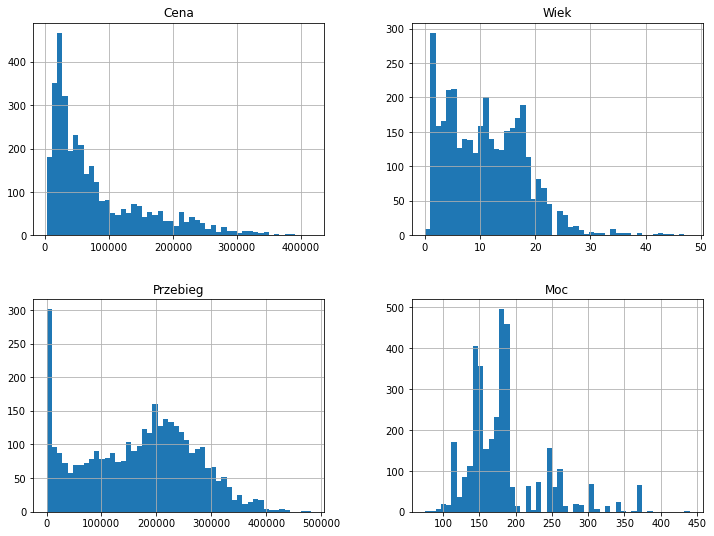

In [62]:
numeric_columns = ['Cena', 'Wiek', 'Przebieg', 'Moc']

data[numeric_columns].hist(bins=50, figsize=(12,9))
plt.show()

As we can see, most cars are sold at relatively low price. The Price graph shows similarities to age graph - we can expect a relationship there.

The mileage resembles a normal, right skewed distribution around ~200000km. There is also a peak at 0km, showing that there are many new car offers.

Looking at the Horse Power we can see peaks at the manufactured engines - around 130, 150, 180/190, 250, 300 and 370 BHP.

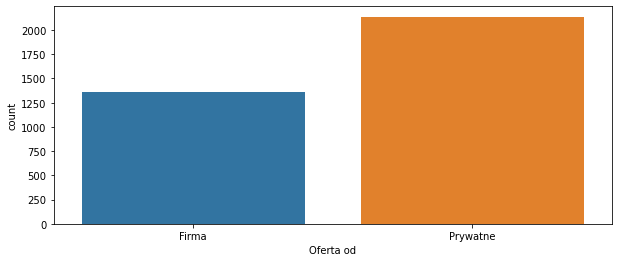

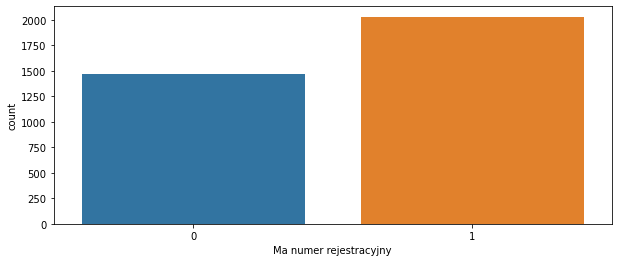

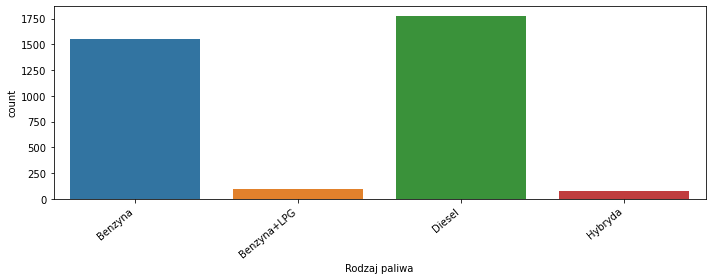

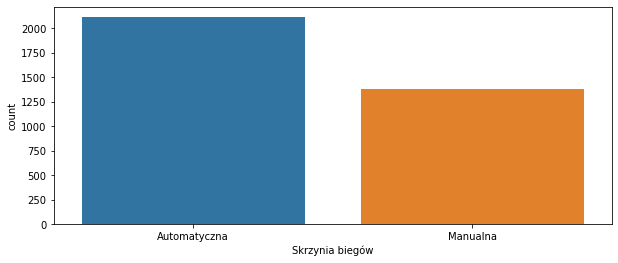

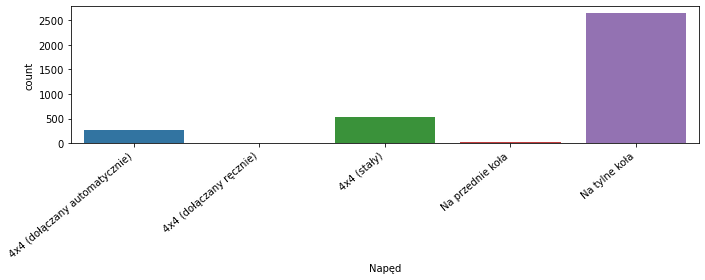

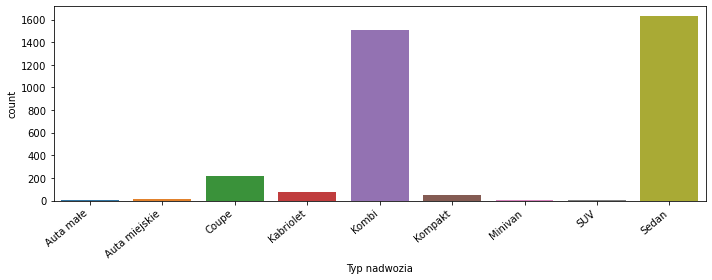

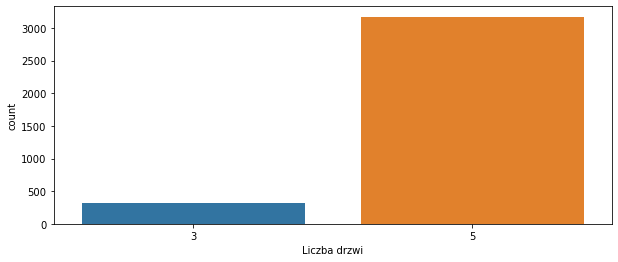

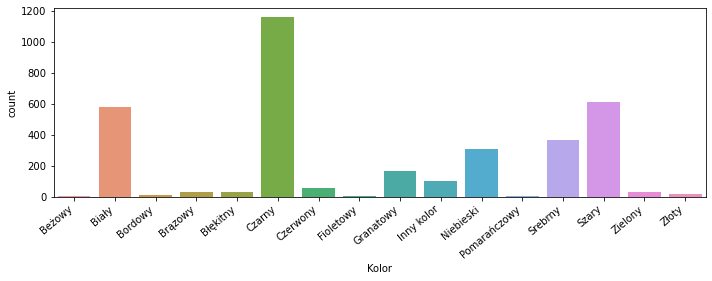

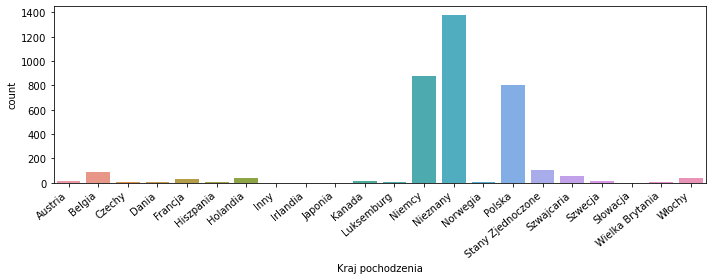

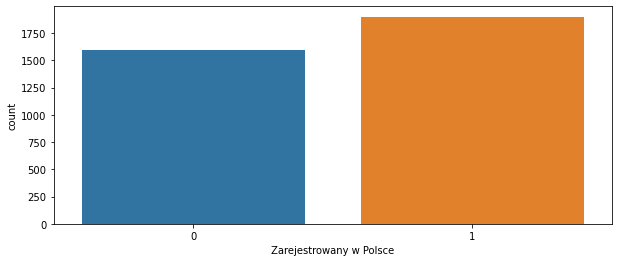

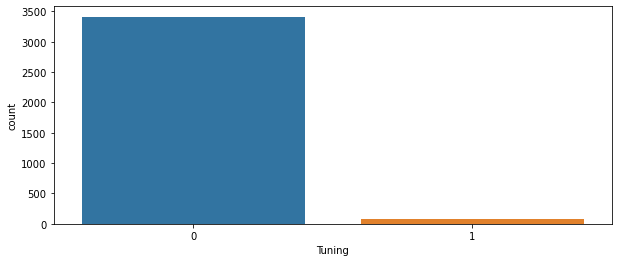

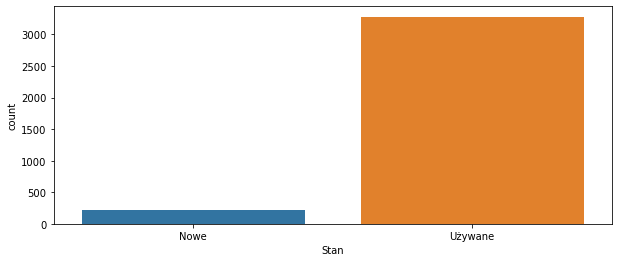

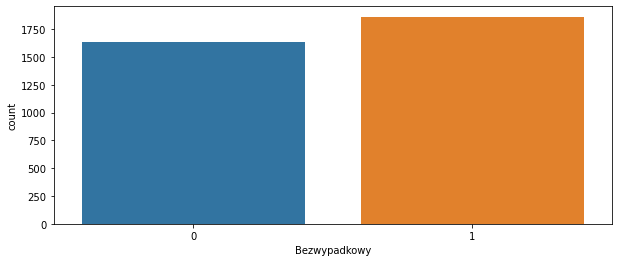

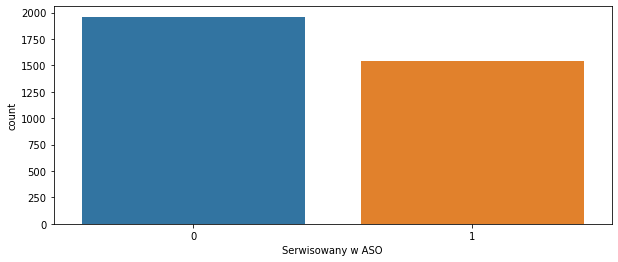

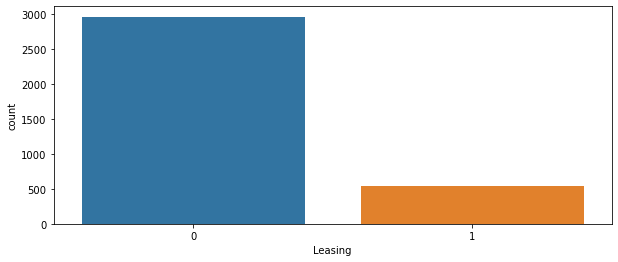

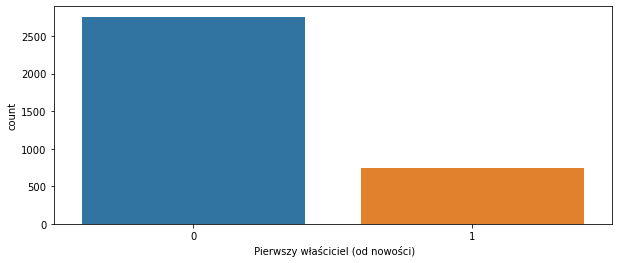

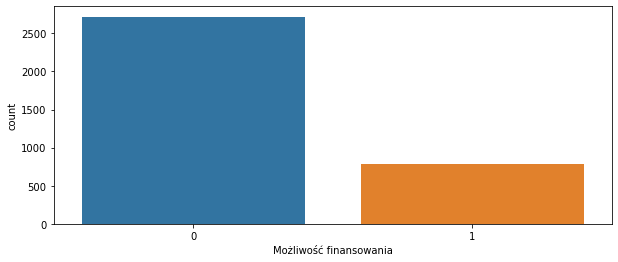

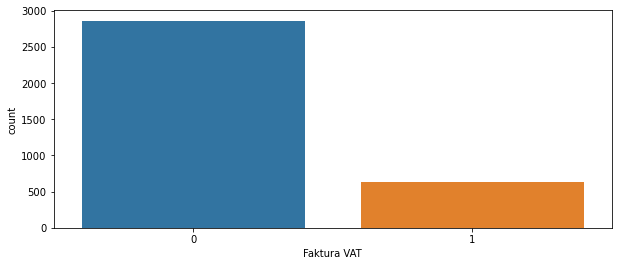

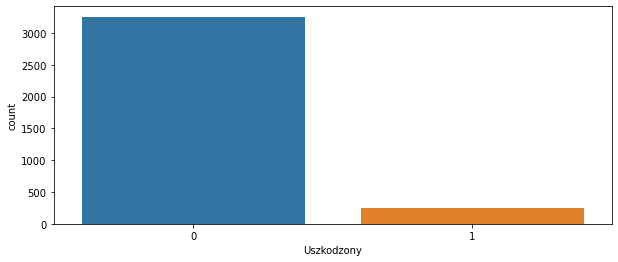

In [63]:
category_data = [item for item in list(data.columns) if item not in numeric_columns]
i=1
for column in category_data:
    fig = plt.figure(figsize=[10,4])
    ax = sns.countplot(x=data[column], data=data)
    if len(data[column].unique()) > 3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()

Looking at categorical data we can see:
* Most offers are private, but there are a lot of corporate offers.
* Diesel and petrol engines are most popular. Gas and hybrid are not common.
* Automatic gear boxes are more common than the manual ones
* Surprisingly there are more offers of German cars than the Polish ones. Although it may not be accurate as there are a lot of undefined offers.
* Almost half of the cars are not registered in Poland
* Car tuning is not popular
* Almost half of the cars are not accident free
* Surprisingly many cars (around 40%) are serviced in authorized services

There are also some issues that may have negative impact on the machine learning model:
* The Napęd (drive) column has multiple values with low number of rows. Also BMW are not manufactured in fron wheel drive. Changing the categories to 4x4 and Rear wheel would help generalization
* Typ nadwozia (chassis) have multiple values with low number of rows. They are probably wrongly inputed, as BMW 3 is not a SUV or a Minivan
* Color has multiple values with low number of rows and probably has not a big impact on price
* Country of origin is split between many diffrent values. Aggregating the less popular to "Other" might benefit the model
* Tuning has not enough values to be influential

In [64]:
# Drive - aggregation 4x4 and changing front to rear drive as it is probably wrongly inputed
data['Napęd'] = data['Napęd'].replace(['4x4 (dołączany automatycznie)', '4x4 (stały)', '4x4 (dołączany ręcznie)', ], '4x4')
data['Napęd'] = data['Napęd'].replace('Na przednie koła', 'Na tylne koła')

# Chassis - drop as there are too many values that may be wrongly classified
data = data.drop('Typ nadwozia', axis=1)

# Color - drop as it may not be important
data = data.drop('Kolor', axis=1)

# Country of origin - change values diffrent from Poland, Germany or Unknown to Other
countries_to_keep = ['Polska', 'Niemcy', 'Nieznany']
countries_list = list(data['Kraj pochodzenia'].unique())
countries_to_replace = [x for x in countries_list if x not in countries_to_keep]
data['Kraj pochodzenia'] = data['Kraj pochodzenia'].replace(countries_to_replace, 'Inny')

# Tuning - drop as the categories are too imbalaced
data = data.drop('Tuning', axis=1)

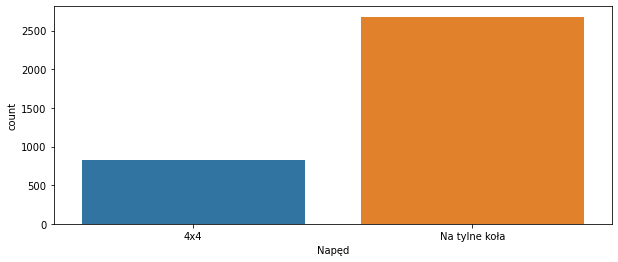

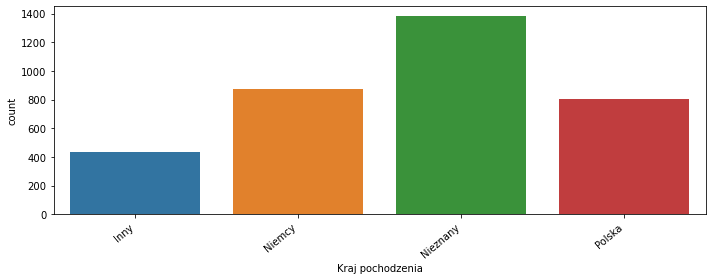

In [65]:
changed_categories = ['Napęd', 'Kraj pochodzenia']
i=1
for column in changed_categories:
    fig = plt.figure(figsize=[10,4])
    ax = sns.countplot(x=data[column], data=data)
    if len(data[column].unique()) > 3:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
        plt.tight_layout()

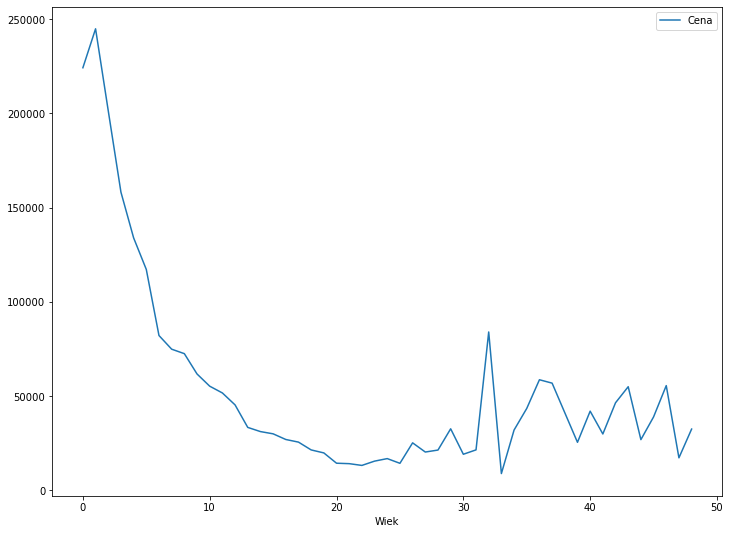

In [66]:
data[['Cena', 'Wiek']].groupby('Wiek').mean().plot(figsize=[12,9])
plt.show()

The mean price by year of manufacturing graph shows us that the greatest price drop occurs in the first 10 years from the manufacturing. 

Cars aged around 20-30 years are valued the lowest. Older cars seem to gain on value, but there is a lot of variability.

Suprisingly, mean price of 2024 cars is lower than 2023 cars.

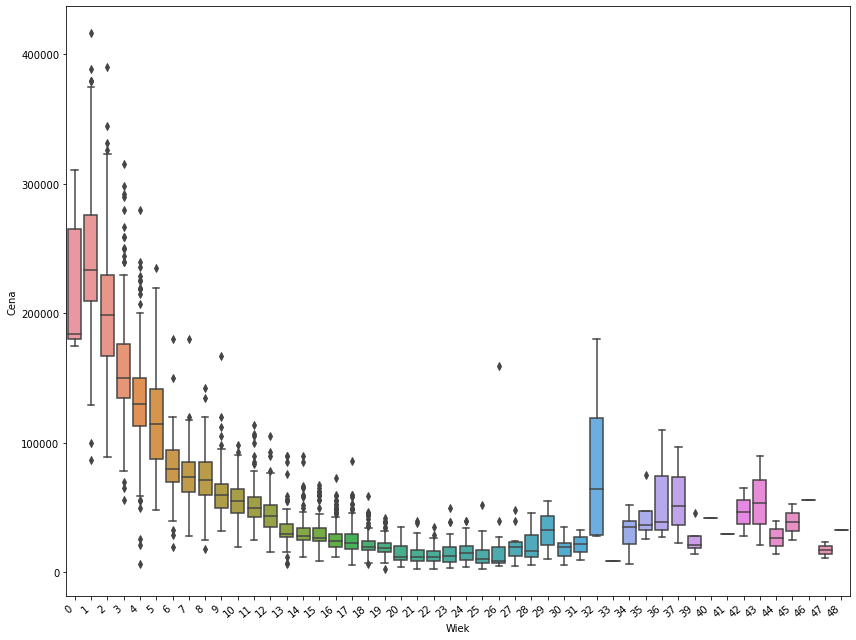

In [67]:
fig = plt.figure(figsize=[12,9])
ax = sns.boxplot(x='Wiek', y='Cena', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In newer and older cars there is more variability. It suggests that factors like rich equipment or condition of a old-timer have a huge factor in pricing. Cars aged between 15 to 30 years are priced much more evenly.

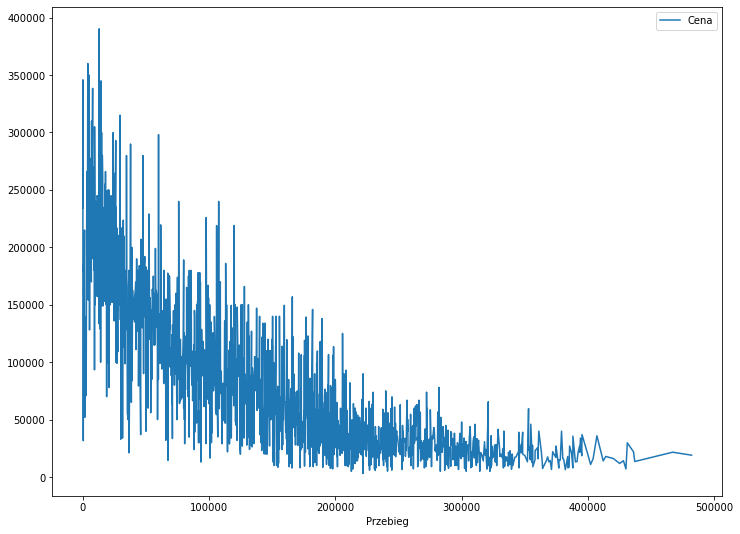

In [68]:
data[['Cena', 'Przebieg']].groupby('Przebieg').mean().plot(figsize=[12,9])
plt.show()

Comparing price to year of manufacturing and price to mileage graphs, we can see that there is much more variability based on mileage. 

The drop in price by mileage is more linear than the year of manufacturing. The cars don't lose as much value within first kilometers as the first years.

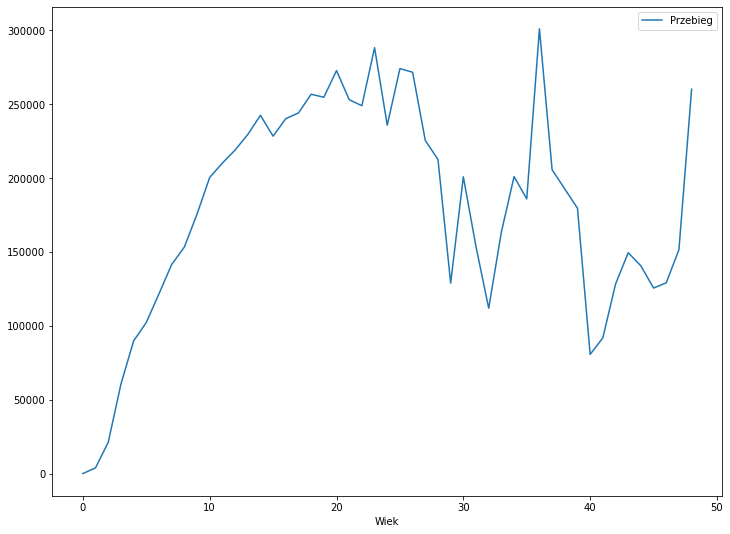

In [69]:
data[['Przebieg', 'Wiek']].groupby('Wiek').mean().plot(figsize=[12,9])
plt.show()

The mean mileage to year of manufacturing graph is very surpising. It has almost linear character in the first ~12 years, but gets very non-linear after ~20 years. 

This may be caused by car/engine longevity. Cars older than 20 years are more prone to fatal breaks or crashes. This leads to offers for cars that are in better condition, that leads to lower mileage

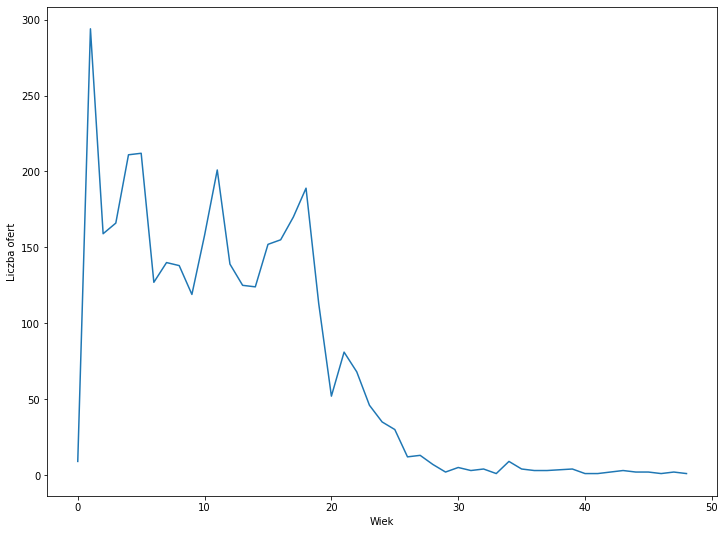

In [70]:
plt.figure(figsize=[12,9])
plt.plot(data[['Przebieg', 'Wiek']].groupby('Wiek').count())
plt.xlabel('Wiek')
plt.ylabel('Liczba ofert')
plt.show()

The number of offers to year of manufacturing plot confirms the theory above - there is a great drop in offers for cars older than 20 years

# Preparing data for machine learning

In [71]:
data.describe()

,Cena,Ma numer rejestracyjny,Przebieg,Moc,Liczba drzwi,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek
count,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000,3498.000000
mean,81129.610635,0.580617,167015.824471,183.118353,4.813608,0.543168,0.532018,0.439394,0.154374,0.211835,0.222985,0.181532,0.069182,11.045455
std,75658.639499,0.493529,101878.736112,53.075995,0.581497,0.498204,0.499045,0.496384,0.361358,0.408667,0.416308,0.385514,0.253800,7.435698
min,2499.000000,0.000000,1.000000,75.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25000.000000,0.000000,83398.750000,150.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,52700.000000,1.000000,179719.500000,177.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
75%,116650.000000,1.000000,242823.750000,190.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
max,416300.000000,1.000000,482000.000000,440.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000


## Using One Hot Encoding to treat categorical variables

String type data cannot be inputed to a machine learning model, so we need to change it to numbers. One hot encoding changes every category into it's own column marked with 0 and 1 depending if the row fits the category

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 3517
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Cena                               3498 non-null   int64   
 1   Oferta od                          3498 non-null   category
 2   Ma numer rejestracyjny             3498 non-null   int64   
 3   Przebieg                           3498 non-null   int64   
 4   Rodzaj paliwa                      3498 non-null   category
 5   Moc                                3498 non-null   int64   
 6   Skrzynia biegów                    3498 non-null   category
 7   Napęd                              3498 non-null   category
 8   Liczba drzwi                       3498 non-null   int32   
 9   Kraj pochodzenia                   3498 non-null   category
 10  Zarejestrowany w Polsce            3498 non-null   int64   
 11  Stan                               3498 non

In [73]:
categorical_columns = list(data.select_dtypes(include='category').columns)

for i in range(len(categorical_columns)):
    if i == 0:
        data_OH = pd.get_dummies(data, columns=[categorical_columns[i], ])
    else:
        data_OH = pd.get_dummies(data_OH, columns=[categorical_columns[i], ])
data_OH

,Cena,Ma numer rejestracyjny,Przebieg,Moc,Liczba drzwi,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek,Oferta od_Firma,Oferta od_Prywatne,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Hybryda,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Napęd_4x4,Napęd_Na tylne koła,Kraj pochodzenia_Inny,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Nieznany,Kraj pochodzenia_Polska,Stan_Nowe,Stan_Używane
0,21900,1,436000,204,5,1,0,0,0,0,0,0,0,21,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1
1,77600,1,92000,245,5,1,1,0,0,0,0,0,0,8,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1
2,29999,1,288000,184,5,1,1,1,0,0,0,0,0,12,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1
3,69900,0,189800,258,5,0,0,0,0,0,0,0,0,11,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
4,58500,1,209000,218,5,1,1,0,0,0,0,0,0,14,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3513,119900,1,47000,150,5,1,0,0,0,0,0,0,0,5,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1
3514,46000,1,283000,183,5,1,1,0,0,0,0,0,0,12,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,1
3515,39000,1,278000,204,3,1,1,1,0,0,0,0,0,19,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1
3516,49000,0,236000,143,5,0,0,0,0,0,0,0,0,9,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1


In [74]:
data_OH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3498 entries, 0 to 3517
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Cena                               3498 non-null   int64
 1   Ma numer rejestracyjny             3498 non-null   int64
 2   Przebieg                           3498 non-null   int64
 3   Moc                                3498 non-null   int64
 4   Liczba drzwi                       3498 non-null   int32
 5   Zarejestrowany w Polsce            3498 non-null   int64
 6   Bezwypadkowy                       3498 non-null   int64
 7   Serwisowany w ASO                  3498 non-null   int64
 8   Leasing                            3498 non-null   int64
 9    Pierwszy właściciel (od nowości)  3498 non-null   int64
 10  Możliwość finansowania             3498 non-null   int64
 11  Faktura VAT                        3498 non-null   int64
 12  Uszkodzony          

The categorical columns have been changed into multiple columns with 0 and 1 as marks in which category the row has been.

## Splitting the dataset into train and test datasets

In [75]:
from sklearn.preprocessing import MinMaxScaler
data_OH_scaled = data_OH

scaler = MinMaxScaler()
data_OH_scaled[:] = scaler.fit_transform(data_OH)


data_OH_scaled.head()

,Cena,Ma numer rejestracyjny,Przebieg,Moc,Liczba drzwi,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek,Oferta od_Firma,Oferta od_Prywatne,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Hybryda,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Napęd_4x4,Napęd_Na tylne koła,Kraj pochodzenia_Inny,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Nieznany,Kraj pochodzenia_Polska,Stan_Nowe,Stan_Używane
0,0.046885,1.0,0.904564,0.353425,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.181491,1.0,0.190870,0.465753,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.066457,1.0,0.597510,0.298630,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.162883,0.0,0.393775,0.501370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.229167,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.135333,1.0,0.433609,0.391781,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291667,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [76]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data_OH_scaled, train_size = 0.7, test_size = 0.3)

print(df_train.shape)
print(df_test.shape)

(2448, 30)
(1050, 30)


In [77]:
df_train.describe()

,Cena,Ma numer rejestracyjny,Przebieg,Moc,Liczba drzwi,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek,Oferta od_Firma,Oferta od_Prywatne,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Hybryda,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Napęd_4x4,Napęd_Na tylne koła,Kraj pochodzenia_Inny,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Nieznany,Kraj pochodzenia_Polska,Stan_Nowe,Stan_Używane
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.00000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,0.188845,0.585784,0.347001,0.295495,0.901552,0.54085,0.534314,0.445261,0.151144,0.207108,0.217320,0.179330,0.072712,0.229601,0.387255,0.612745,0.441993,0.027778,0.509804,0.020425,0.611928,0.388072,0.234886,0.765114,0.115605,0.253268,0.394608,0.236520,0.061683,0.938317
std,0.179825,0.492687,0.212719,0.143694,0.297980,0.49843,0.498923,0.497096,0.358262,0.405316,0.412507,0.383707,0.259717,0.154388,0.487222,0.487222,0.496725,0.164369,0.500006,0.141477,0.487411,0.487411,0.424014,0.424014,0.319815,0.434972,0.488866,0.425032,0.240628,0.240628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.054376,0.000000,0.170243,0.205479,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.120833,1.000000,0.372861,0.279452,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.218750,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.271872,1.000000,0.504652,0.315068,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354167,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,0.936967,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
X_train = df_train.iloc[:,1:]
Y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:] 
Y_test = df_test.iloc[:,0]
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2448, 29)
(2448,)
(1050, 29)
(1050,)


In [79]:
X_train.head()

,Ma numer rejestracyjny,Przebieg,Moc,Liczba drzwi,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Leasing,Pierwszy właściciel (od nowości),Możliwość finansowania,Faktura VAT,Uszkodzony,Wiek,Oferta od_Firma,Oferta od_Prywatne,Rodzaj paliwa_Benzyna,Rodzaj paliwa_Benzyna+LPG,Rodzaj paliwa_Diesel,Rodzaj paliwa_Hybryda,Skrzynia biegów_Automatyczna,Skrzynia biegów_Manualna,Napęd_4x4,Napęd_Na tylne koła,Kraj pochodzenia_Inny,Kraj pochodzenia_Niemcy,Kraj pochodzenia_Nieznany,Kraj pochodzenia_Polska,Stan_Nowe,Stan_Używane
853,0.0,0.537252,0.260274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.354167,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
824,1.0,0.405808,0.632877,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.312500,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
891,0.0,0.000008,0.205479,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.020833,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1295,1.0,0.235061,0.315068,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.145833,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
416,0.0,0.271905,0.315068,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.041667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


# Building the machine learning model

## Linear regression

In [80]:
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

R2_train = []
R2_test = []
CV = []

def predict_model(model, model_name, X_train, Y_train, X_test, Y_test):
    model.fit(X_train,Y_train)
            
    # R2 score of train set
    Y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(Y_train,Y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    Y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(Y_test,Y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,Y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))

    # Y_test vs Y_train scatter plot
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Y_train vs Y_pred_train')
    ax[0].scatter(x = Y_train, y = Y_pred_train)
    ax[0].set_xlabel('Y_train')
    ax[0].set_ylabel('Y_pred_train')
    ax[1].set_title('Y_test vs Y_pred_test')
    ax[1].scatter(x = Y_test, y = Y_pred_test)
    ax[1].set_xlabel('Y_test')
    ax[1].set_ylabel('Y_pred_test')
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    return model

Train R2-score : 0.86
Test R2-score : 0.85
Train CV scores : [0.85940415 0.83512533 0.86617109 0.87638659 0.85988116]
Train CV mean : 0.86


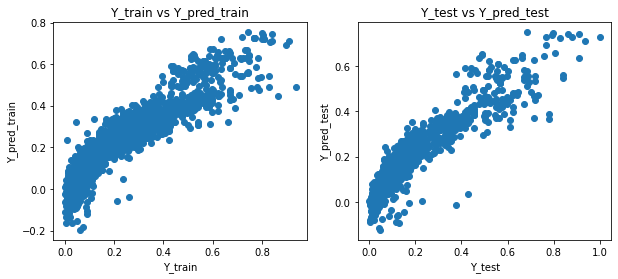

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV



linear_model = predict_model(LinearRegression(), 'Linear Regression', X_train, Y_train, X_test, Y_test)

## Ridge regression

Train R2-score : 0.86
Test R2-score : 0.85
Train CV scores : [0.8597533  0.83505888 0.86594094 0.8757074  0.86026865]
Train CV mean : 0.86


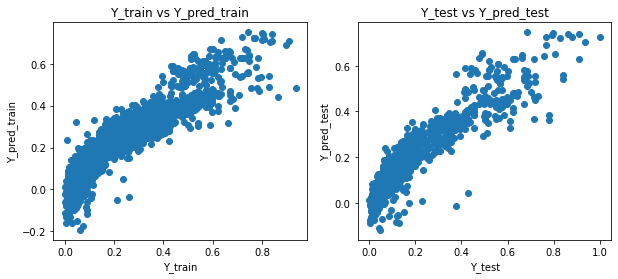

In [82]:
ridge_model = predict_model(Ridge(), 'Ridge Regression', X_train, Y_train, X_test, Y_test)

## Lasso regression

Train R2-score : 0.86
Test R2-score : 0.85
Train CV scores : [0.85751478 0.83087301 0.82954662 0.82835895 0.85506913]
Train CV mean : 0.84


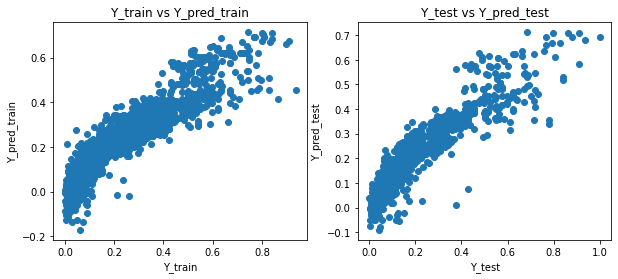

In [83]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

lasso_model = predict_model(ls_rs, 'Lasso Regression', X_train, Y_train, X_test, Y_test)

## Random Forest Regression

Train R2-score : 0.97
Test R2-score : 0.95
Train CV scores : [0.9417402  0.95103951 0.94362373 0.95344525 0.93432163]
Train CV mean : 0.94


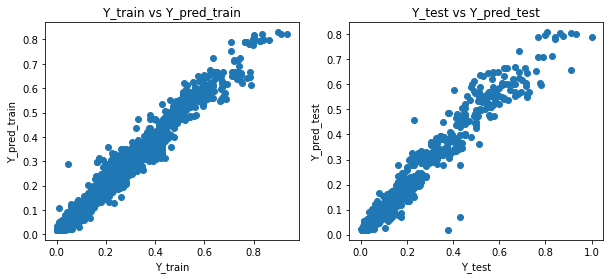

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

forest_model = predict_model(rf_rs, 'Random Forrest Regression', X_train, Y_train, X_test, Y_test)

## Models evaluation and feature importance

Linear, Ridge and Lasso Regression have all had very similar results of R squared 0.86 for train and 0.85 for test data. The results are fairly okay, and are very well balanced.

Random Forest Regressor had a great result of R squared 0.97 for train and 0.95 for test data. This means that it is a clearly best.

Let's see which features were most important in determining the price of a car

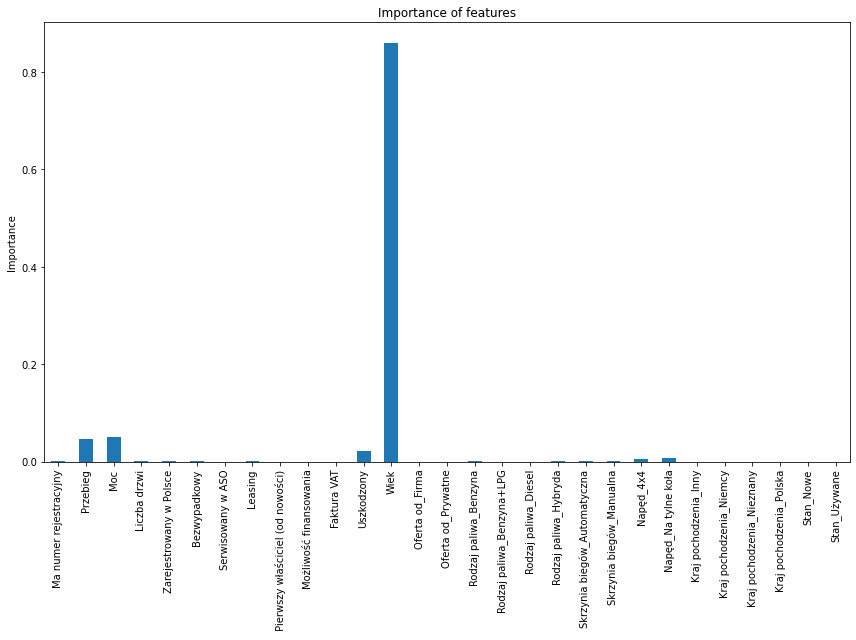

In [96]:
importances = forest_model.best_estimator_.feature_importances_
feature_names = data_OH.iloc[:, 1:].columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=[12,9])
forest_importances.plot.bar()
ax.set_title("Importance of features")
ax.set_ylabel("Importance")
fig.tight_layout()

Let's compare it with linear regression.
Here we can see the coeficients, so we know if the feature has a negative or positive impact on the price

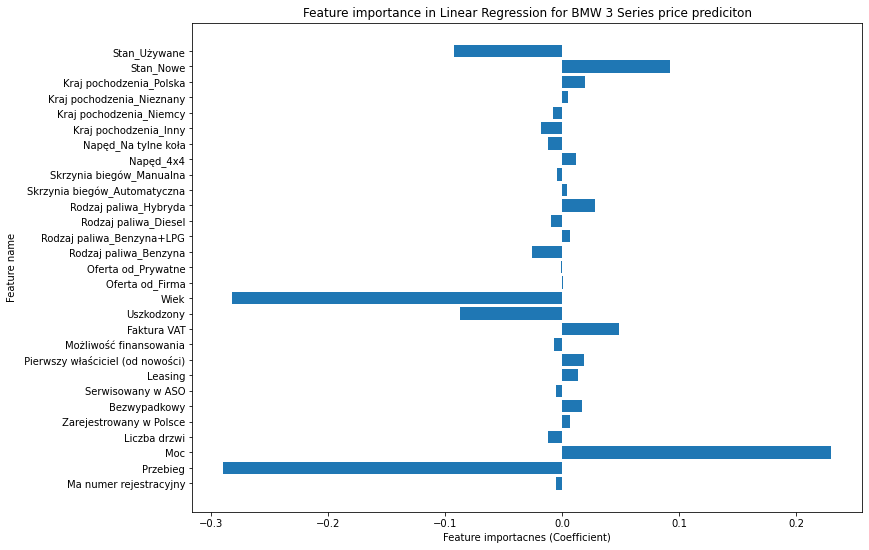

In [98]:
coeficients = linear_model.coef_

plt.figure(figsize=[12,9])
plt.barh(feature_names, coeficients)
plt.xlabel("Feature importacnes (Coefficient)")
plt.ylabel("Feature name")
plt.title("Feature importance in Linear Regression for BMW 3 Series price prediciton")
plt.show()

# Conclusion
As we can see, the predictions can be very accurate. Surprisingly, the best performing model - Random Forest Regressor bases its prediction almost entirely on age of the car. 

We can see that the prediction by Linear Regression is much more balanced (based on multiple features) but does not achieve as great results as the Random Forest Regressor